### Step 2: Feature Engineering

### 1. Importing Libraries
import the necessary libraries needed for feature engineering

In [1]:
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import string
import nltk
from nltk.util import bigrams, trigrams
from nltk.corpus import stopwords
from gensim.models import Word2Vec #install gensim # had to use this: pip install --upgrade gensim smart_open protobuf==3.20.0
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from scipy.stats import chi2_contingency


c:\Users\dxcas\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Download various NLTK resources necessary for performing natural language processing tasks

In [2]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-

True

Use pandas to read the cleaned and preprocessed data stored in a pickle file named "data_cleaned.pkl"

In [3]:
data = pd.read_pickle('data/data_cleaned.pkl')

In [4]:
data.head()

,comment,parent_comment,label
0,lol it is obvious you have listened to every s...,because his music oozes positivity....,1
1,he is not a parody of any one specific charact...,i detest family guy so i am not imminently fam...,0
2,in before the observing shi'ite islamists recl...,i just realised that smite is the only communi...,0
3,peeker's advantage,cs:bs where exactly should i aim??,1
4,"you are right, he is garbage and any 200 elo s...","yes, dl did what every adc is supposed to do, ...",1


### 2.Tokenizing  
Define a function tokenize_text that takes a text input and generates unigrams. Apply the tokenize_text function to tokenize the 'comment' and 'parent_comment' columns into unigrams.

In [5]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens
    
# Unigram Tokenizing
data["comment_tokens"] = data["comment"].apply(lambda x: tokenize_text(x))
data["parent_comment_tokens"] = data["parent_comment"].apply(lambda x: tokenize_text(x))

### 3. Removing Stop Words 

Remove words no and not from stop_words as these words may have sematic meaning. Defines a filtering function for unigrams, which removes stopwords from a list of tokens. 

In [6]:
#remove possible words from stop_words that can change meaning of text
stop_words = set(stopwords.words('english'))

to_remove = ["no","not"]
for word in to_remove:
    stop_words.remove(word)
    
# Filtering function for unigrams
def filter_unigrams(tokens):
    return [token for token in tokens if token not in stop_words]

# Apply the filtering functions
data["comment_tokens"] = data["comment_tokens"].apply(filter_unigrams)
data["parent_comment_tokens"] = data["parent_comment_tokens"].apply(filter_unigrams)

### 4.Lemmatization 
Define a lemmatization function for unigrams which applies lemmatization to the tokenized unigrams,converting words to their base or root forms.

In [7]:
lemmatizer = WordNetLemmatizer()
# Lemmatize function for unigrams
def lemmatize_unigrams(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]


# Apply the lemmatize functions
data["comment_tokens"] = data["comment_tokens"].apply(lemmatize_unigrams)
data["parent_comment_tokens"] = data["parent_comment_tokens"].apply(lemmatize_unigrams)

### 5. Sentiment Analysis

Utilizes the polarity_scores method of the VADER analyzer to compute the compound sentiment score for each comment and parent comment. The compound score represents the overall sentiment, combining positive, negative, and neutral scores.

In [8]:
sia = SentimentIntensityAnalyzer()
data['comment_score'] = data['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['parent_comment_score'] = data['parent_comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

Creates a box plot of comment sentiment scores

c:\Users\dxcas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


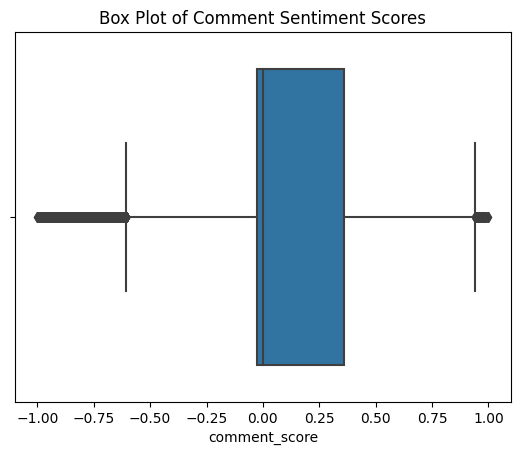

In [9]:
sns.boxplot(data['comment_score'])
plt.title('Box Plot of Comment Sentiment Scores')
plt.show()

Creates a box plot of parent comment sentiment scores

c:\Users\dxcas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


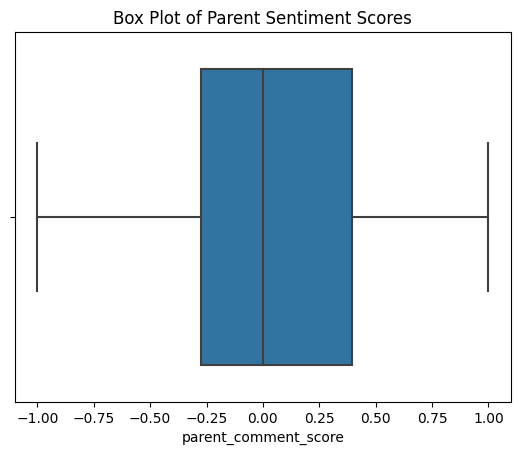

In [10]:
sns.boxplot(data['parent_comment_score'])
plt.title('Box Plot of Parent Sentiment Scores')
plt.show()

Create a kernel density plot comparing the distribution of sentiment scores for both comments and parent comments. This plot provides insights into the density and shape of the sentiment score distributions.

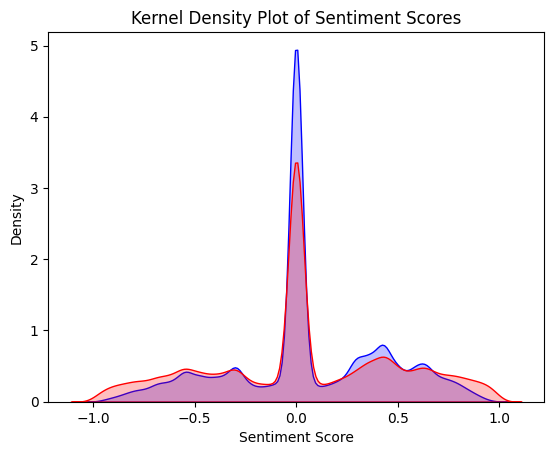

In [11]:
sns.kdeplot(data['comment_score'], shade=True, color = 'blue')
sns.kdeplot(data['parent_comment_score'], shade = True, color='red')
plt.title('Kernel Density Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

categorizes parent comment and comment sentiment scores into three labels ('positive,' 'negative,' or 'neutral') based on predefined thresholds. 

In [12]:
def sentiment(score):
    if (score >= 0.25):
        return 'positive'
    elif (score <= -0.25):
        return 'negative'
    else:
        return 'neutral'
    
data['weighted_comment_sentiment_score'] = data['comment_score'].apply(sentiment)
data['weighted_parent_sentiment_score'] = data['parent_comment_score'].apply(sentiment)
data.head()

,comment,parent_comment,label,comment_tokens,parent_comment_tokens,comment_score,parent_comment_score,weighted_comment_sentiment_score,weighted_parent_sentiment_score
0,lol it is obvious you have listened to every s...,because his music oozes positivity....,1,"[lol, obvious, listened, every, song, .]","[music, ooze, positivity, ....]",0.4215,0.0000,positive,neutral
1,he is not a parody of any one specific charact...,i detest family guy so i am not imminently fam...,0,"[not, parody, one, specific, character, anythi...","[detest, family, guy, not, imminently, familia...",0.0000,0.4767,neutral,positive
2,in before the observing shi'ite islamists recl...,i just realised that smite is the only communi...,0,"[observing, shi'ite, islamist, reclaiming, upp...","[realised, smite, community, normally, say]",0.0000,0.0000,neutral,neutral
3,peeker's advantage,cs:bs where exactly should i aim??,1,"[peeker, 's, advantage]","[c, :, b, exactly, aim, ?, ?]",0.2500,0.0000,positive,neutral
4,"you are right, he is garbage and any 200 elo s...","yes, dl did what every adc is supposed to do, ...",1,"[right, ,, garbage, 200, elo, scrub, could, ma...","[yes, ,, dl, every, adc, supposed, ,, scoot, s...",-0.2960,-0.1280,negative,neutral


creates a contingency table to explore the relationship between sentiment scores (categorized as 'positive,' 'negative,' or 'neutral') and the 'label' column. The contingency table presents a summary of how sentiment is distributed within each label category, offering insights into potential associations between sentiment and labels in the dataset.

In [13]:
contingency_table = pd.crosstab(data['label'], data['weighted_comment_sentiment_score'])

# Display the contingency table
print(contingency_table)

weighted_comment_sentiment_score  negative  neutral  positive
label                                                        
0                                    28313    78237     44894
1                                    32352    68707     50527


performs a chi-square test for independence to assess whether there is a significant association between sentiment scores (categorized as 'positive,' 'negative,' 'neutral') and the 'label' column in the dataset. 

In [14]:
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-Square Value: {chi2}')
print(f'P-value: {p}')

Chi-Square Value: 1219.44361513082
P-value: 1.5892180105910784e-265


generates a stacked bar plot to visually represent the distribution of labels ('Not Sarcastic' and 'Sarcastic') across different sentiment scores ('positive,' 'negative,' 'neutral'). The plot provides insights into the relationship between sentiment scores and labels in the dataset.

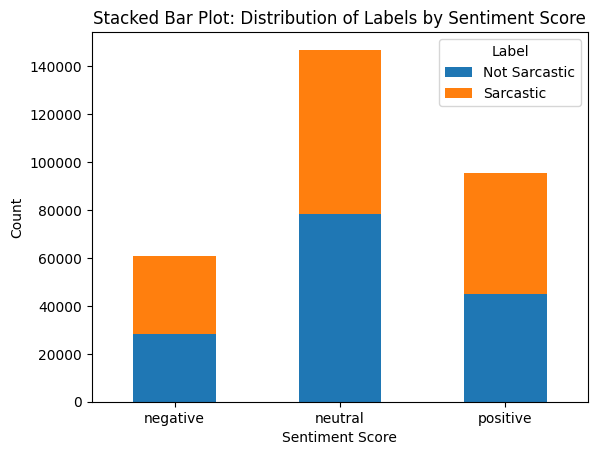

In [15]:
stacked_data = data.groupby(['weighted_comment_sentiment_score', 'label']).size().unstack().fillna(0)

stacked_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Distribution of Labels by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['Not Sarcastic', 'Sarcastic'])
plt.show()

generates a heatmap to visually represent the distribution of labels ('Not Sarcastic' and 'Sarcastic') across different sentiment scores ('positive,' 'negative,' 'neutral'). The heatmap provides an overview of the relationship between sentiment scores and labels in the dataset.

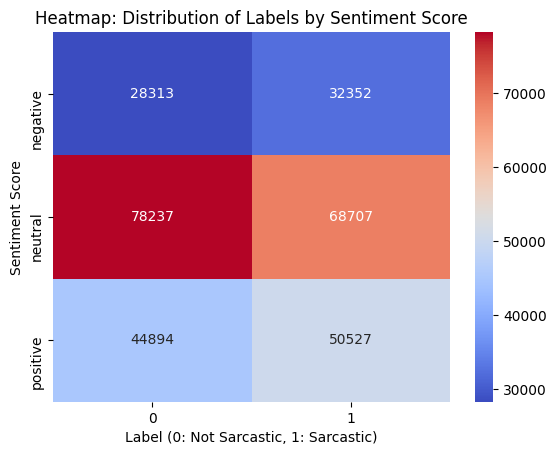

In [16]:
heatmap_data = data.groupby(['weighted_comment_sentiment_score', 'label']).size().unstack().fillna(0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap: Distribution of Labels by Sentiment Score')
plt.xlabel('Label (0: Not Sarcastic, 1: Sarcastic)')
plt.ylabel('Sentiment Score')
plt.show()

performs one-hot encoding on the sentiment score columns ('weighted_parent_sentiment_score' and 'weighted_comment_sentiment_score')

In [17]:
# One Hot Encode Weighted Sentiment Scores
data = pd.get_dummies(data, columns = ['weighted_parent_sentiment_score','weighted_comment_sentiment_score'], drop_first=True)

In [18]:
data.head()

,comment,parent_comment,label,comment_tokens,parent_comment_tokens,comment_score,parent_comment_score,weighted_parent_sentiment_score_neutral,weighted_parent_sentiment_score_positive,weighted_comment_sentiment_score_neutral,weighted_comment_sentiment_score_positive
0,lol it is obvious you have listened to every s...,because his music oozes positivity....,1,"[lol, obvious, listened, every, song, .]","[music, ooze, positivity, ....]",0.4215,0.0000,1,0,0,1
1,he is not a parody of any one specific charact...,i detest family guy so i am not imminently fam...,0,"[not, parody, one, specific, character, anythi...","[detest, family, guy, not, imminently, familia...",0.0000,0.4767,0,1,1,0
2,in before the observing shi'ite islamists recl...,i just realised that smite is the only communi...,0,"[observing, shi'ite, islamist, reclaiming, upp...","[realised, smite, community, normally, say]",0.0000,0.0000,1,0,1,0
3,peeker's advantage,cs:bs where exactly should i aim??,1,"[peeker, 's, advantage]","[c, :, b, exactly, aim, ?, ?]",0.2500,0.0000,1,0,0,1
4,"you are right, he is garbage and any 200 elo s...","yes, dl did what every adc is supposed to do, ...",1,"[right, ,, garbage, 200, elo, scrub, could, ma...","[yes, ,, dl, every, adc, supposed, ,, scoot, s...",-0.2960,-0.1280,1,0,0,0


### 6. Basic Text Features
- extracted these features mostly from the original sentences
- extracted token count, unique token count and mean token length

 performs feature engineering by extracting various statistical features from pre-tokenized text data. These features capture information about word and token counts, unique words and tokens, stopwords, mean word/token length, character count, punctuation count, hashtag count, and number count for both comments and parent comments.

In [19]:
#data = data[['label','comment', 'parent_comment']]
###pre-tokenised###
# Word Count
data['comment_word_count'] = data['comment'].apply(lambda x: len(str(x).split()))
data['parent_comment_word_count'] = data['parent_comment'].apply(lambda x: len(str(x).split()))
data['comment_token_count'] = data['comment_tokens'].apply(lambda x: len(x))
data['parent_comment_token_count'] = data['parent_comment_tokens'].apply(lambda x: len(x))

# Unique Word Count
data['comment_unique_word_count'] = data['comment'].apply(lambda x: len(set(str(x).split())))
data['parent_comment_unique_word_count'] = data['parent_comment'].apply(lambda x: len(set(str(x).split())))
data['comment_unique_token_count'] = data['comment_tokens'].apply(lambda x: len(set(x)))
data['parent_comment_unique_token_count'] = data['parent_comment_tokens'].apply(lambda x: len(set(x)))

# Stop Word Count
stop = stopwords.words('english')
data['comment_stopword_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop]))
data['parent_comment_stopword_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop]))

# Mean Word Length
data['comment_mean_word_length'] = data['comment'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
data['parent_comment_mean_word_length'] = data['parent_comment'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
data['comment_mean_token_length'] = data['comment_tokens'].apply(lambda x: np.mean([len(token) for token in x]))
data['parent_comment_mean_token_length'] = data['parent_comment_tokens'].apply(lambda x: np.mean([len(token) for token in x]))

# Character Count
data['comment_char_count'] = data['comment'].apply(lambda x: len(str(x)))
data['parent_comment_char_count'] = data['parent_comment'].apply(lambda x: len(str(x)))

# Punctuation Count
data['comment_punctuation_count'] = data['comment'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))
data['parent_comment_punctuation_count'] = data['parent_comment'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))

# Hashtag and Number Count
data['comment_hashtag_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.startswith('#')]))
data['parent_comment_hashtag_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.startswith('#')]))

data['comment_number_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.isdigit()]))
data['parent_comment_number_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.isdigit()]))

c:\Users\dxcas\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


### 7. Bag of Words

Concatenates the tokenized comments and parent comments into text documents for further processing.

In [20]:
documents_comments = data['comment_tokens'].apply(lambda tokens_list:' '.join(tokens_list))
documents_parent_comments = data['parent_comment_tokens'].apply(lambda tokens_list:' '.join(tokens_list))

Utilizes the CountVectorizer from scikit-learn to transform the tokenized comments and parent comments into a Bag-of-Words (BoW) representation. With the help of the CountVectorizer, we are able to also able to generate bigrams and trigrams, allowing us to better capture the sematics of a sentence.

In [21]:
# For comments
vectorizer_comments = CountVectorizer(min_df=4, ngram_range=(1, 3))
bow_matrix_comments = vectorizer_comments.fit_transform(documents_comments)
bow_matrix_csr = csr_matrix(bow_matrix_comments)
data['comment_bow'] = [row for row in bow_matrix_csr]

# For parent comments
vectorizer_parent_comments = CountVectorizer(min_df=4, ngram_range=(1, 3))
bow_matrix_parent_comments = vectorizer_parent_comments.fit_transform(documents_parent_comments)
bow_matrix_csr_parent = csr_matrix(bow_matrix_parent_comments)
data['parent_comment_bow'] = [row for row in bow_matrix_csr_parent]


Defines a function bow_to_words to extract the feature names from a CSR representation. 

In [22]:
### Function to extract feature names from CSR representation
feature_names_bow = vectorizer_comments.get_feature_names_out() # to reverse
def bow_to_words(bow_vector, feature_names):
    # Convert the sparse matrix row to a dense array
    array = bow_vector.toarray().flatten()
    # Get the tokens that have a count > 0
    tokens = [feature_names[i] for i, count in enumerate(array) if count > 0]
    return tokens

In [23]:
bow_to_words(data['comment_bow'].iloc[0],feature_names_bow) # we see that the trigrams are not present in this one example- likely due to the trigrams being much more rare.

['every', 'every song', 'listened', 'lol', 'obvious', 'song']

### 8. TF-IDF

utilizes the TfidfVectorizer from scikit-learn to transform tokenized comments and parent comments into a TF-IDF representation. With the help of the TfidfVectorizer, we are able to also able to generate bigrams and trigrams, allowing us to better capture the sematics of a sentence.

In [24]:
tdvectorizer_comments = TfidfVectorizer(min_df = 4, ngram_range=(1, 3))
tfidf_matrix_comments = tdvectorizer_comments.fit_transform(documents_comments)
tfidf_matrix_csr = csr_matrix(tfidf_matrix_comments)
data['comment_tfidf'] = [row for row in tfidf_matrix_csr]

tdvectorizer_parent_comments = TfidfVectorizer(min_df = 4, ngram_range=(1, 3))
tfidf_matrix_parent_comments = tdvectorizer_parent_comments.fit_transform(documents_parent_comments)
tfidf_matrix_csr_parent = csr_matrix(tfidf_matrix_parent_comments)
data['parent_comment_tfidf'] = [row for row in tfidf_matrix_csr_parent]

Defines a function tfidf_to_words to extract the feature names and corresponding TF-IDF values from a TF-IDF representation.

In [25]:
feature_names_tfidf = tdvectorizer_comments.get_feature_names_out()
def tfidf_to_words(tfidf_row, feature_names):
    """
    Convert a TF-IDF row to its word representation.
    :param tfidf_row: A single row from a sparse matrix.
    :param feature_names: List of feature names from the TF-IDF vectorizer.
    :return: List of words from the TF-IDF row.
    """
    dense_tfidf = tfidf_row.toarray().flatten()
    words_indices = dense_tfidf.nonzero()[0]
    words = [(feature_names[index], dense_tfidf[index]) for index in words_indices]
    return words

reducing size of tf-idf map for RNN

Utilizes the TfidfVectorizer from scikit-learn to transform tokenized comments into a TF-IDF representation with an increased min_df parameter. Retrieves the feature names and checks the number of features in the TF-IDF representation with the increased min_df parameter.

In [26]:
tdvectorizer_comments_nn = TfidfVectorizer(min_df = 20, ngram_range=(1, 3))
tfidf_matrix_comments_nn = tdvectorizer_comments_nn.fit_transform(documents_comments)
tfidf_matrix_nn_csr = csr_matrix(tfidf_matrix_comments_nn)
data['comment_tfidf_nn'] = [row for row in tfidf_matrix_nn_csr]
len(tdvectorizer_comments_nn.get_feature_names_out())# if we increase min_df to 10, number of features reduces to 15799
tdvectorizer_comments_nn.get_feature_names_out()

array(['00', '000', '000 000', ..., 'zone', 'zoo', 'zoom'], dtype=object)

Tests the extraction of features from both Bag-of-Words (BoW) and TF-IDF representations for a subset of the data. 

In [27]:
# Testing out Extraction
df = data.head(10)
#print(data.columns)
df[['comment_bow', 'comment_tfidf']]
print(df['comment_bow'].iloc[3])
print(bow_to_words(df['comment_bow'].iloc[3], feature_names_bow))
print(df['comment_tfidf'].iloc[3])
print(tfidf_to_words(df['comment_tfidf'].iloc[3], feature_names_tfidf))

  (0, 1644)	1
['advantage']
  (0, 1644)	1.0
[('advantage', 1.0)]


Saves the processed data, including the newly generated TF-IDF representation, to a pickle file for future use.

In [28]:
data.to_pickle("data/data_w_feature_eng.pkl")

Saves TF-IDF Vectorizers for feature importance

In [34]:
from joblib import dump
dump(tdvectorizer_comments, 'tdvectorizer.pkl')
dump(tdvectorizer_comments_nn, 'tdvectorizer_nn.pkl')


['tdvectorizer_nn.pkl']